In [ ]:
# 주성분분석(PCA) 차원축소 알고리즘
# 이미지나 영상 데이터는 용량이 큼 -> 주성분을 분석해서 압축

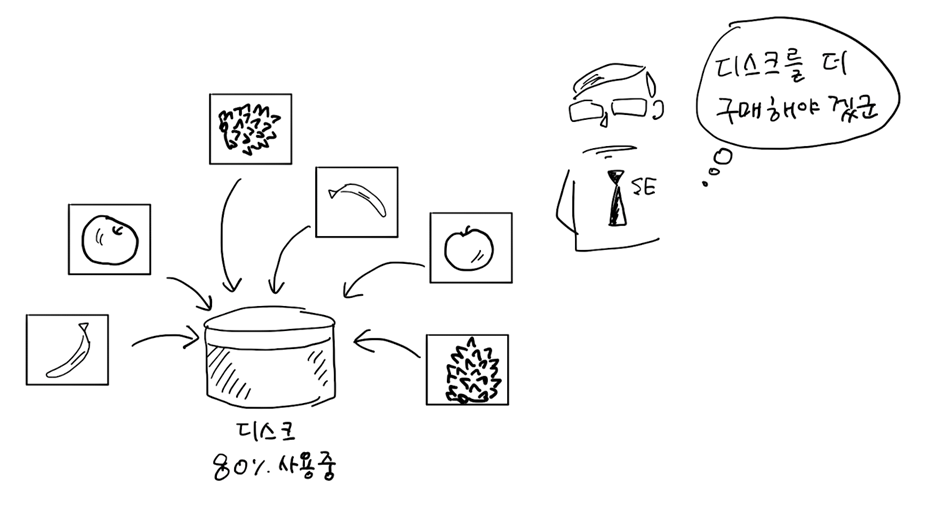

In [2]:
# 특성이 많으면 선형 모델의 성능이 높아지고 훈련 데이터에 쉽게 과대적합된다.

# 차원축소 : 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터
#   크기를 줄이고 지도학습 모델의 성능을 향상시키기 위함

# 주성분 분석(PCA (Principal Component Analysis))
# 줄인 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수도 있어야함
# https://ddongwon.tistory.com/114

# 주성분 분석은 데이터에 있는 분산이 큰 방향을 찾는것으로 이해(분산 : 데이터가 널리 퍼져있는 정도)
#   -> 데이터를 잘 표현하는 벡터?

!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-03-13 05:32:45--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-03-13 05:32:45--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-03-13 05:32:46--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... con

In [3]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(300, -1)

from sklearn.decomposition import PCA   # 주성분 분석 알고리즘사용
# 사이킷런의 decomposition 모듈 아래 PCA 클래스로 활용
pca = PCA(n_components=50) # PCA 클래스를 만들 때 주성분의 개수를 지정함 50
pca.fit(fruits_2d) # 비지도 학습임으로 타킷 제외 학습

PCA(n_components=50)

In [78]:
print(fruits_2d.shape)
print(pca.components_.shape)
# PCA로 추출된 50개의 주성분이 있으며, 각 주성분은 원래 데이터 차원(10,000)에 대응
# 이후 pca.transform()을 사용하면 실제 데이터 차원 축소가 가능

(300, 10000)
(50, 10000)


In [10]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 +j < n:
                axs[i,j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()


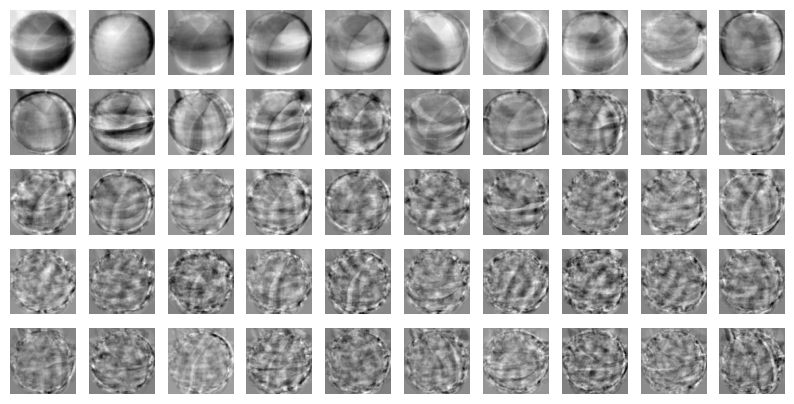

In [11]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [79]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_2d.shape)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


In [14]:
# 원본 데이터의 재구성 -> inverse_transform()
fruits_inverse = pca.inverse_transform(fruits_pca) # 원본처럼 재구성
print(fruits_inverse.shape) # 50개의 특성을 다시 10000개로 복원

(300, 10000)


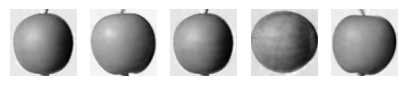

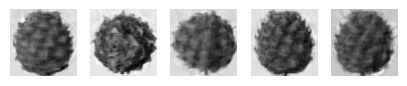

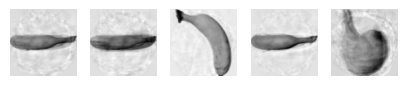

In [29]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
draw_fruits(fruits_reconstruct[:5])
draw_fruits(fruits_reconstruct[100:105])
draw_fruits(fruits_reconstruct[200:205])

In [17]:
# 50개의 특성은 얼마나 분산을 보존하고 있을까?
# 설명된 분산(explained varience): 주성분이 원본데이터의 분산을 얼마나 잘 나타내는지 기록한 값
print(pca.explained_variance_ratio_)

print(np.sum(pca.explained_variance_ratio_)) # 92%

[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645188 0.00578896 0.00511201
 0.00486383 0.00480344 0.00447835 0.00437314 0.00408037 0.00389474
 0.00372436 0.00359278 0.00331416 0.00317851 0.0030431  0.00303756
 0.00288898 0.00275808 0.00264873 0.00255492 0.00252169 0.00247374
 0.0023964  0.00230912 0.00221465 0.00215382 0.00213947 0.00196514
 0.00192418 0.00190958 0.00183965 0.00181889 0.00174165 0.00169489
 0.00163026 0.00161917]
0.9215803308171977


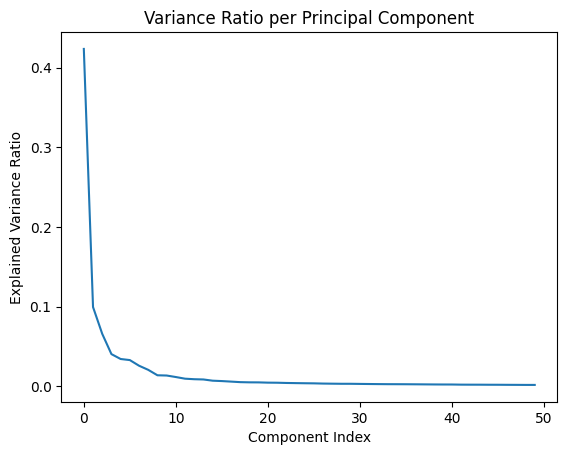

In [21]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Ratio per Principal Component')
plt.show() # 개별

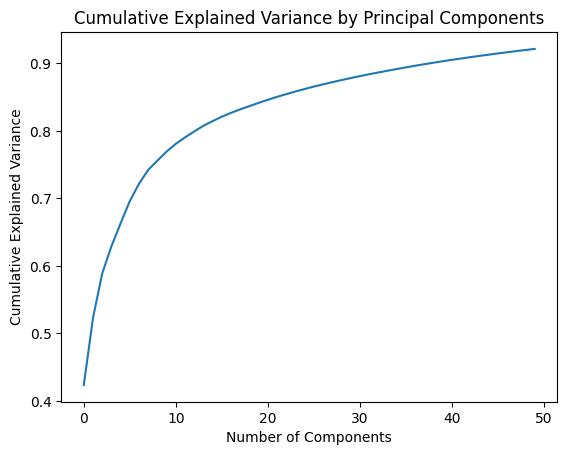

In [24]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show() # 누적

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
target = np.array([0]*100 + [1]*100 + [2]*100)

In [54]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr , fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) # 0.91 초

0.9966666666666667
0.9135193347930908


In [80]:
pca = PCA(n_components=50)
pca.fit(fruits_2d)
scores = cross_validate(lr , fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) # 0.03초

0.9966666666666667
0.02230525016784668


In [70]:
pca = PCA(n_components=0.5) # 주성분 50% (0~1 사이의 실수값 입력시 비율로 설정가능)
pca.fit(fruits_2d)
print(pca.n_components_)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape) # 0.42357017 0.09941755 두개만으로 0.5가 넘어가기 때문

2
(300, 2)


In [57]:
scores = cross_validate(lr , fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) # 0.02초

0.9966666666666667
0.02395658493041992


In [59]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
fruits_pca.shape

(300, 2)

In [61]:
print(np.unique(km.labels_, return_counts=True))
# 전에 있던 값 (array([0, 1, 2], dtype=int32), array([112,  98,  90]))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


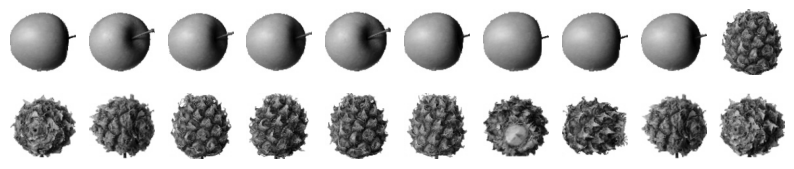

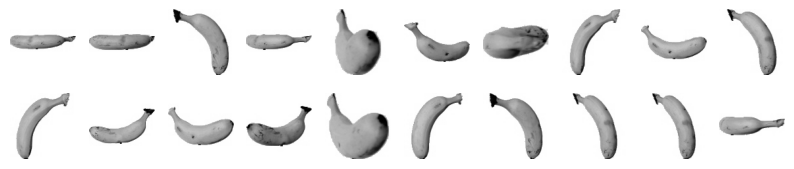

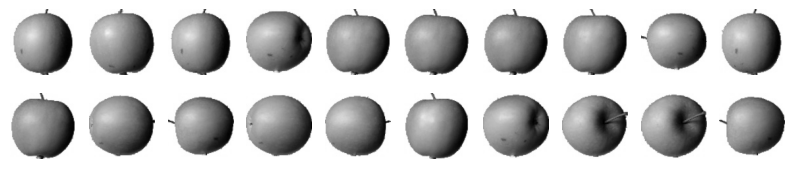

In [63]:
for label in range(0, 3):
    selected_fruits = fruits[km.labels_ == label][:20]  # 각 라벨에서 최대 20개만 선택
    draw_fruits(selected_fruits)
    print("\n")

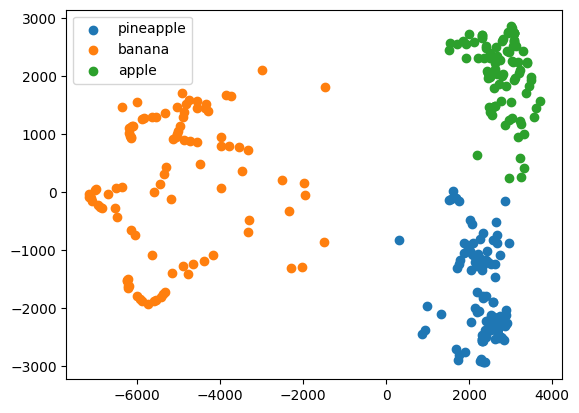

In [93]:
# 훈련 데이터의 차원을 줄이면 또 하나 얻을 수 있는 장점은 시각화가 가능하다.
# 3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉽다.
# fruits_pca 데이터가 2개의 특성으로 있기 때문에 2차원으로 표현할 수 있다.
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
                    # km.labels_ 를 사용해 클러스터별로 나누어 산점도를 그림
    plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple', 'banana', 'apple']) # 범례표시
plt.show()


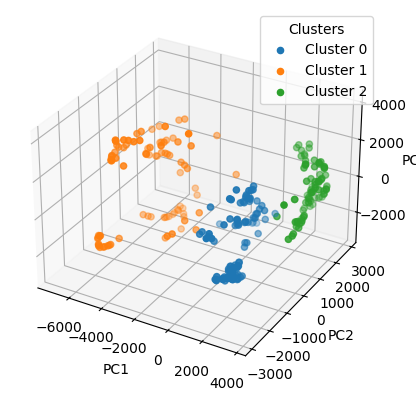

In [97]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D 산점도를 그리기 위한 모듈

# 3D Axes 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 각 라벨별로 데이터 추출
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]  # 클러스터에 해당하는 데이터만 추출

    # 3D 산점도 그리기
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], label=f'Cluster {label}')

# 레이블 추가 (선택 사항)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# 범례 추가
plt.legend(title="Clusters")

# 화면에 출력
plt.show()
